## Unsupervised Learning Final Project

The final project for unsupervised learning.

In [1]:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA



In [2]:
df = pd.read_csv('Country-data.csv')

In [3]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
df.shape

(167, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Data Exploration

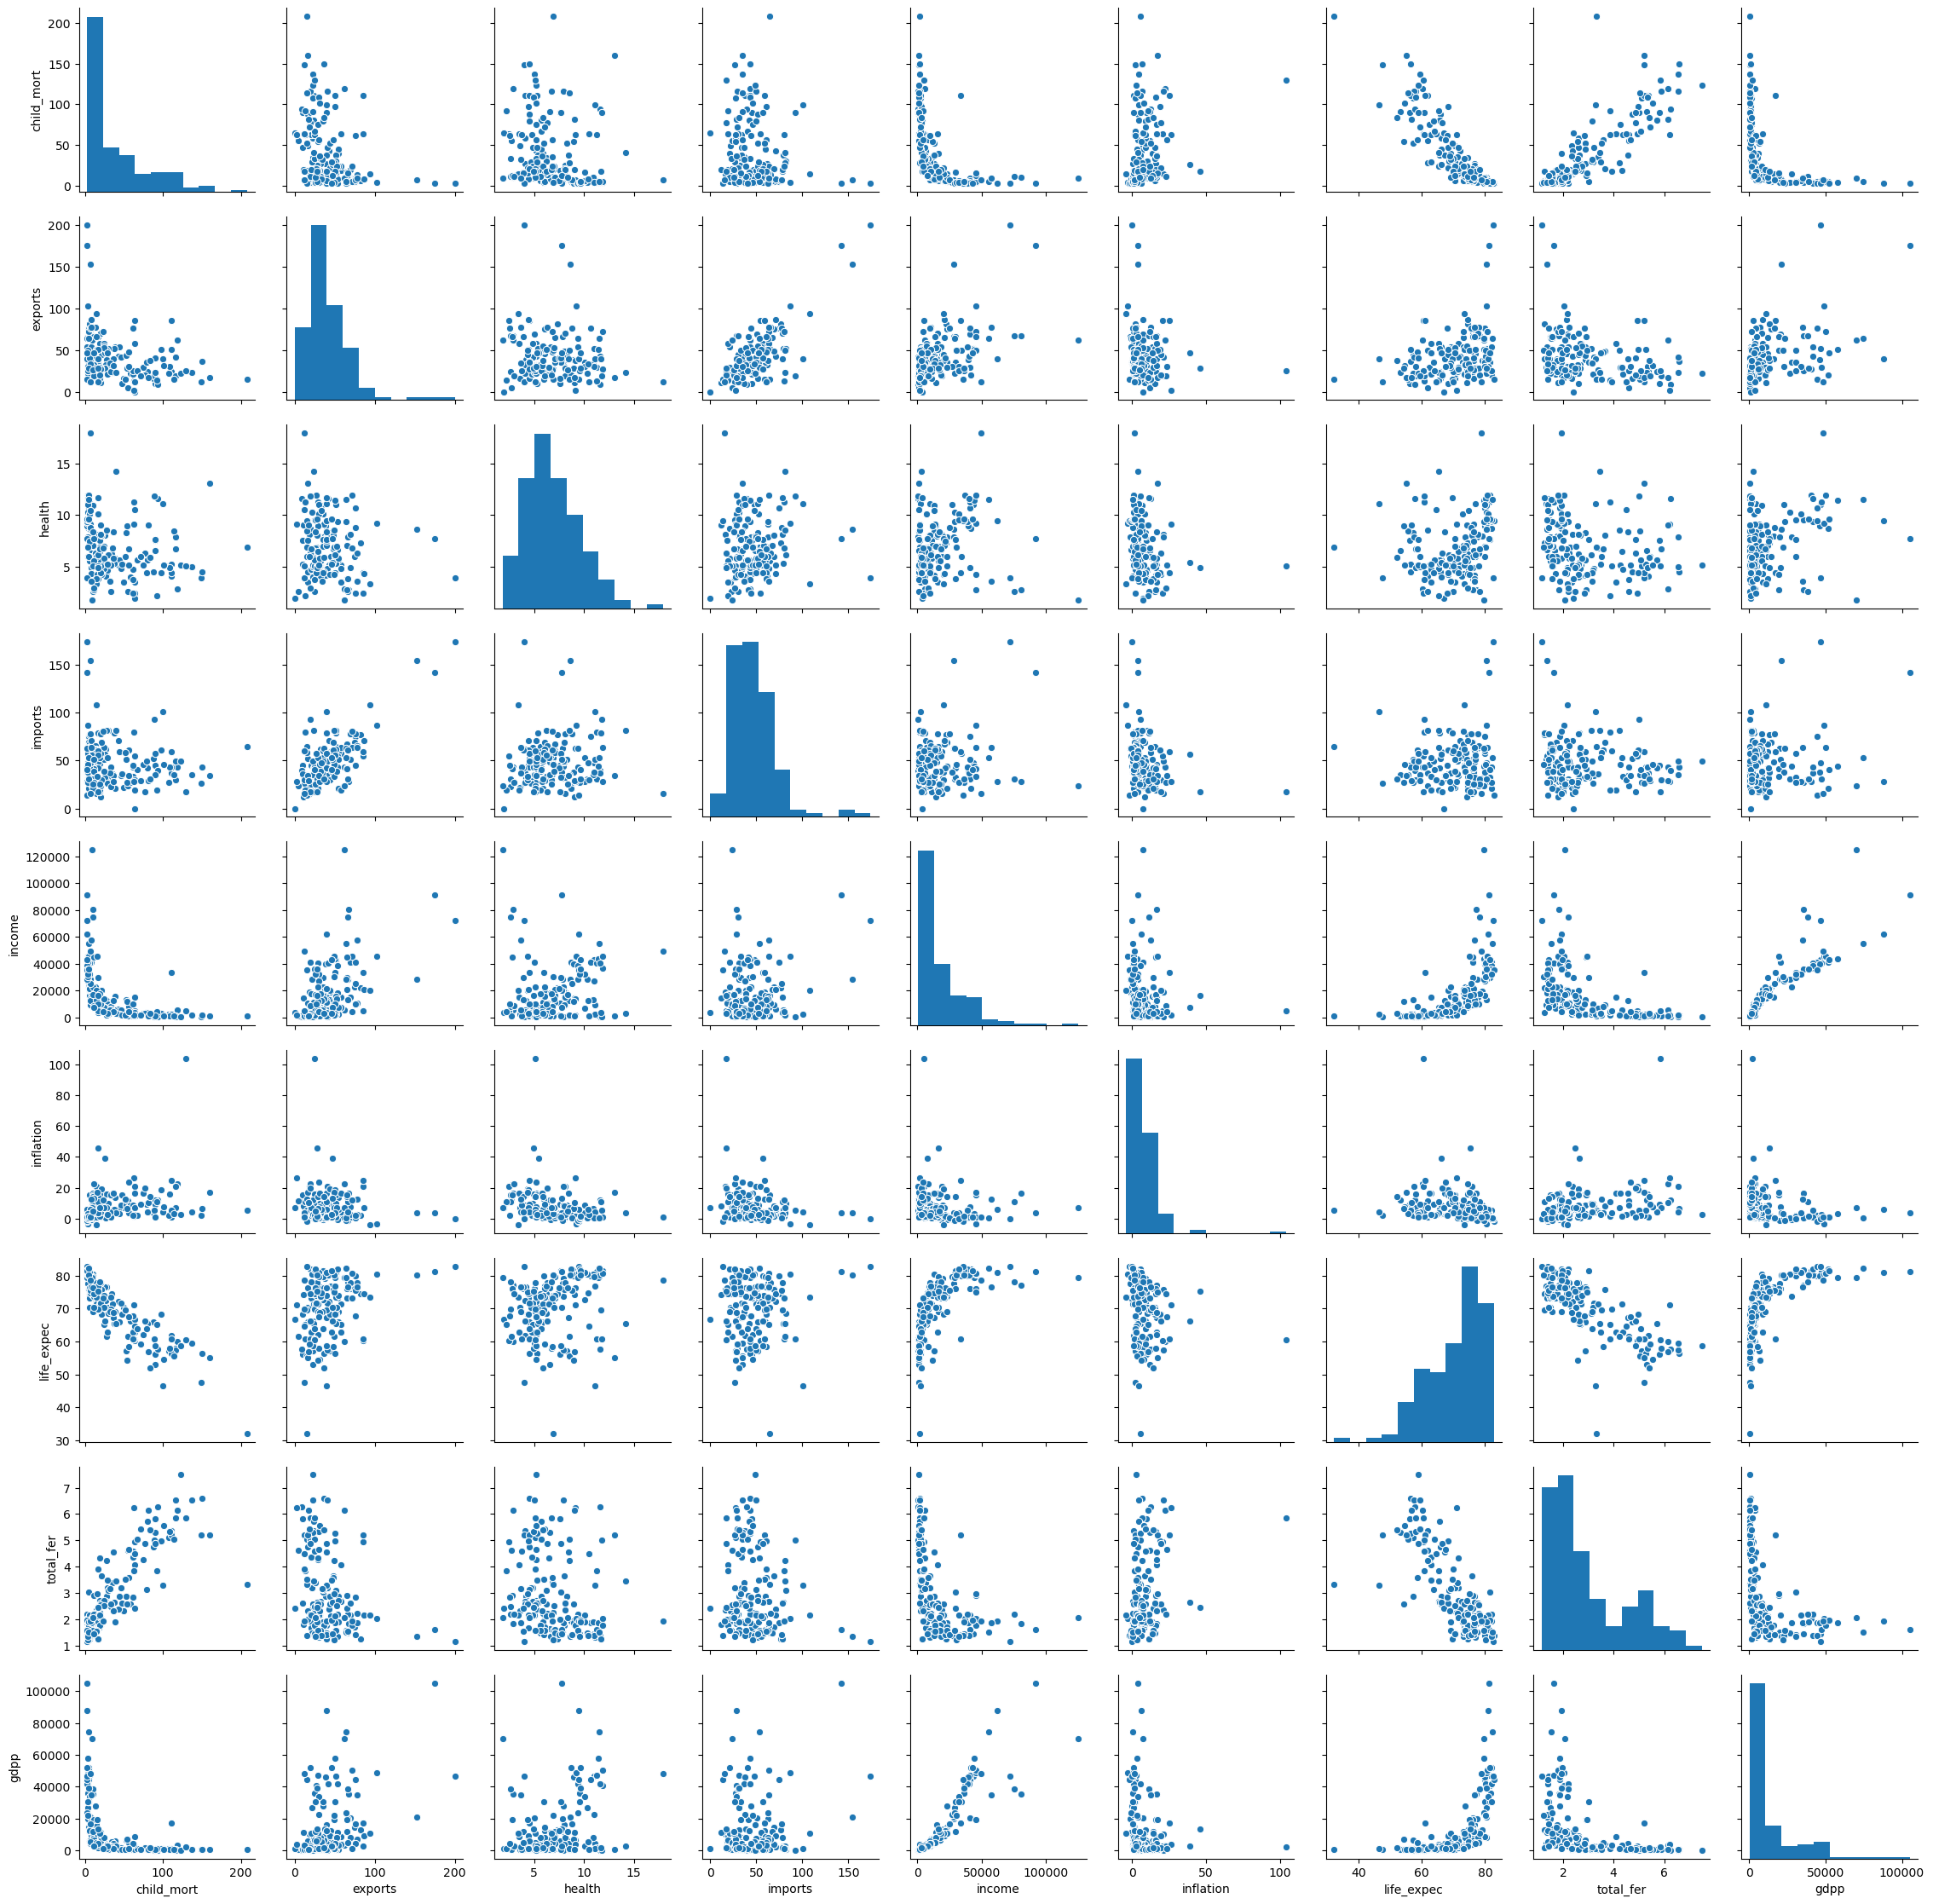

In [6]:
sns.pairplot(df)

<AxesSubplot:xlabel='total_fer', ylabel='child_mort'>

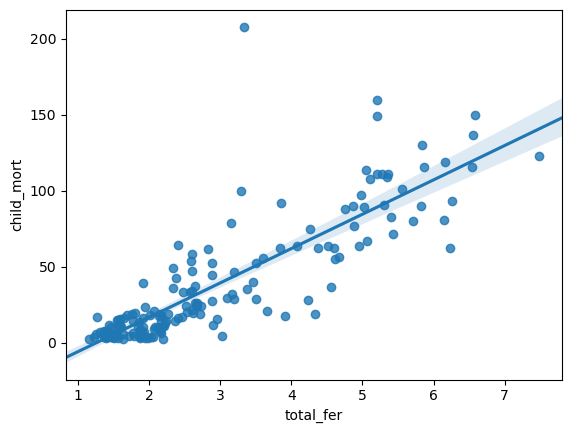

In [7]:
sns.regplot(x=df['total_fer'], y=df['child_mort'])

<AxesSubplot:xlabel='life_expec', ylabel='child_mort'>

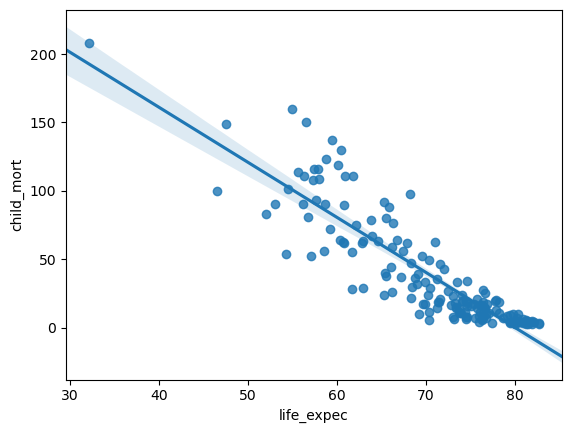

In [8]:
sns.regplot(x=df['life_expec'], y=df['child_mort'])

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

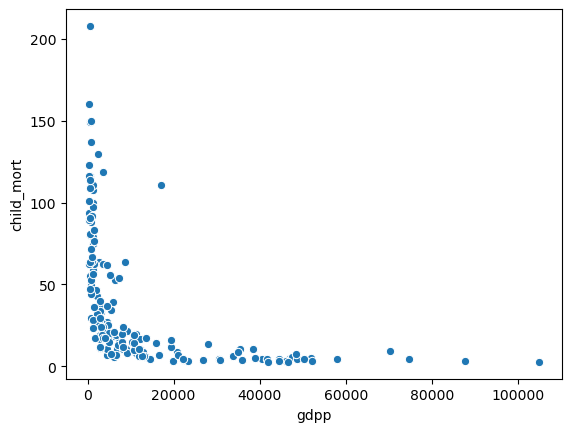

In [9]:
sns.scatterplot(x=df['gdpp'], y=df['child_mort'])

<AxesSubplot:xlabel='gdpp', ylabel='life_expec'>

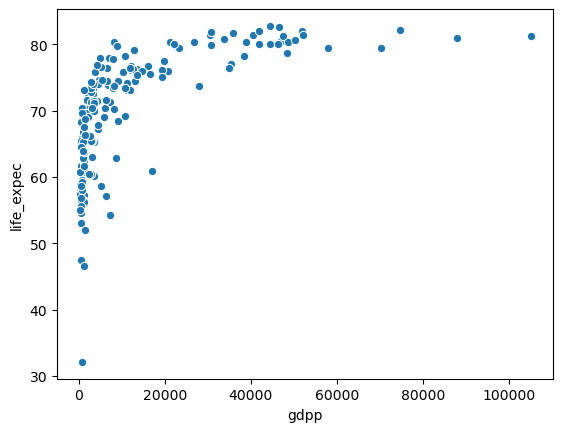

In [10]:
sns.scatterplot(x=df['gdpp'], y=df['life_expec'])

<AxesSubplot:xlabel='gdpp', ylabel='income'>

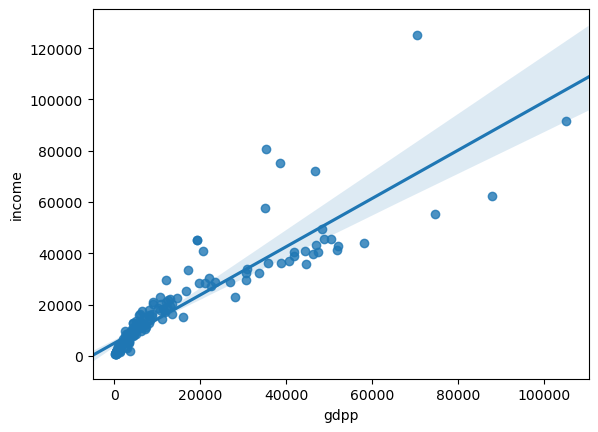

In [11]:
sns.regplot(x=df['gdpp'], y=df['income'])

<AxesSubplot:>

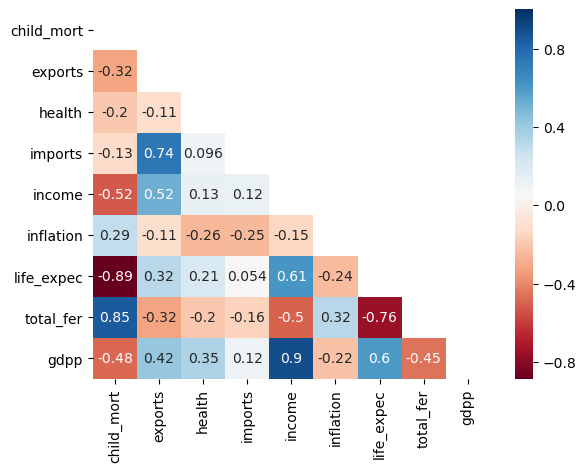

In [12]:
sns.heatmap(df.corr(), cmap='RdBu', annot=True, mask=np.triu(df.corr()))

In [13]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [14]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [15]:
df2 = df.drop("country", axis=1)
df2.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

In [16]:
df2 = df.drop("country", axis=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(df2)
X[:5]

array([[0.42648491, 0.04948197, 0.35860783, 0.25776487, 0.00804721,
        0.12614361, 0.47534517, 0.73659306, 0.00307343],
       [0.06815969, 0.13953104, 0.29459291, 0.27903729, 0.07493307,
        0.08039922, 0.87179487, 0.07886435, 0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, 0.18014926, 0.0988094 ,
        0.1876906 , 0.87573964, 0.27444795, 0.04036499],
       [0.56669912, 0.31112456, 0.06463642, 0.24626626, 0.04253523,
        0.24591073, 0.55226824, 0.79022082, 0.03148832],
       [0.03748783, 0.22707876, 0.2622747 , 0.33825512, 0.14865223,
        0.05221329, 0.8816568 , 0.15457413, 0.11424181]])

## K-Means Clustering

In [17]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters)
km.fit(df2)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [18]:
km.inertia_

36528387934.3221

Next we use the elbow method to determine the right number of clusters with K-Means.

In [19]:
num_clusters = range(1,10)
inertia=[]
for num in num_clusters:
    km = KMeans(init='k-means++', random_state=1, n_clusters=num)
    km.fit(X)
    inertia.append(km.inertia_)

Text(0, 0.5, 'Inertia')

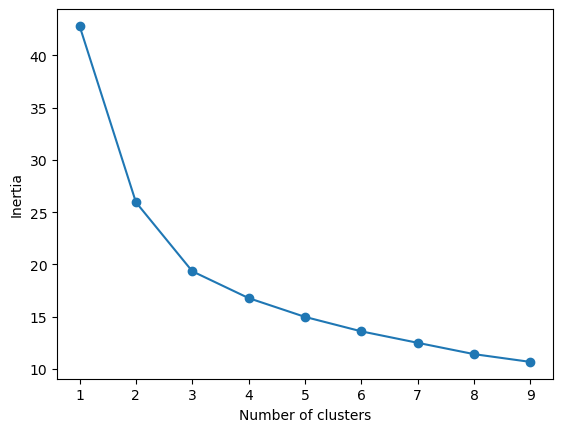

In [20]:
plt.plot(num_clusters, inertia)
plt.scatter(num_clusters, inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

From the plot, sharp decreases in the inertia from changing clusters are observed as number of clusters changes from 1 to 3. Afterwards, the inertia begins to drop off less sharply, so the optimal point for number of clusters is 3.

In [21]:
k_opt = KMeans(init='k-means++', random_state=1, n_clusters=3)
k_opt.fit(X)
k_opt.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [22]:
df3 = df.copy()
df3['Cluster Labels'] = k_opt.labels_
df3['Cluster Labels'] = df3['Cluster Labels'].astype('str')
df3.T

0        1        2       3                    4    \
country         Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda   
child_mort             90.2     16.6     27.3   119.0                 10.3   
exports                10.0     28.0     38.4    62.3                 45.5   
health                 7.58     6.55     4.17    2.85                 6.03   
imports                44.9     48.6     31.4    42.9                 58.9   
income                 1610     9930    12900    5900                19100   
inflation              9.44     4.49     16.1    22.4                 1.44   
life_expec             56.2     76.3     76.5    60.1                 76.8   
total_fer              5.82     1.65     2.89    6.16                 2.13   
gdpp                    553     4090     4460    3530                12200   
Cluster Labels            1        0        0       1                    0   

                      5        6          7        8           9    ...  \
country         Argentina  Armenia  Australia  Austria  Azerbaijan  ...   
child_mort           14.5     18.1        4.8      4.3        39.2  ...   
exports              18.9     20.8       19.8     51.3        54.3  ...   
health                8.1      4.4       8.73     11.0        5.88  ...   
imports              16.0     45.3       20.9     47.8        20.7  ...   
income              18700     6700      41400    43200       16000  ...   
inflation            20.9     7.77       1.16    0.873        13.8  ...   
life_expec           75.8     73.3       82.0     80.5        69.1  ...   
total_fer            2.37     1.69       1.93     1.44        1.92  ...   
gdpp                10300     3220      51900    46900        5840  ...   
Cluster Labels          0        0          2        2           0  ...   

                                 157             158            159      160  \
country         United Arab Emirates  United Kingdom  United States  Uruguay   
child_mort                       8.6             5.2            7.3     10.6   
exports                         77.7            28.2           12.4     26.3   
health                          3.66            9.64           17.9     8.35   
imports                         63.6            30.8           15.8     25.4   
income                         57600           36200          49400    17100   
inflation                       12.5            1.57           1.22     4.91   
life_expec                      76.5            80.3           78.7     76.4   
total_fer                       1.87            1.92           1.93     2.08   
gdpp                           35000           38900          48400    11900   
Cluster Labels                     2               2              2        0   

                       161      162        163      164    165     166  
country         Uzbekistan  Vanuatu  Venezuela  Vietnam  Yemen  Zambia  
child_mort            36.3     29.2       17.1     23.3   56.3    83.1  
exports               31.7     46.6       28.5     72.0   30.0    37.0  
health                5.81     5.25       4.91     6.84   5.18    5.89  
imports               28.5     52.7       17.6     80.2   34.4    30.9  
income                4240     2950      16500     4490   4480    3280  
inflation             16.5     2.62       45.9     12.1   23.6    14.0  
life_expec            68.8     63.0       75.4     73.1   67.5    52.0  
total_fer             2.34      3.5       2.47     1.95   4.67     5.4  
gdpp                  1380     2970      13500     1310   1310    1460  
Cluster Labels           0        0          0        0      1       1  

[11 rows x 167 columns]

In [23]:
clusters = df3.groupby('Cluster Labels')

In [24]:
clusters.get_group('0')

country  child_mort  exports  health  imports  income  \
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
5              Argentina        14.5     18.9    8.10     16.0   18700   
6                Armenia        18.1     20.8    4.40     45.3    6700   
..                   ...         ...      ...     ...      ...     ...   
160              Uruguay        10.6     26.3    8.35     25.4   17100   
161           Uzbekistan        36.3     31.7    5.81     28.5    4240   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   

     inflation  life_expec  total_fer   gdpp Cluster Labels  
1         4.49        76.3       1.65   4090              0  
2        16.10        76.5       2.89   4460              0  
4         1.44        76.8       2.13  12200              0  
5        20.90        75.8       2.37  10300              0  
6         7.77        73.3       1.69   3220              0  
..         ...         ...        ...    ...            ...  
160       4.91        76.4       2.08  11900              0  
161      16.50        68.8       2.34   1380              0  
162       2.62        63.0       3.50   2970              0  
163      45.90        75.4       2.47  13500              0  
164      12.10        73.1       1.95   1310              0  

[86 rows x 11 columns]

In [25]:
clusters.get_group('1')

country  child_mort  exports  health  imports  income  \
0                 Afghanistan        90.2    10.00    7.58     44.9    1610   
3                      Angola       119.0    62.30    2.85     42.9    5900   
17                      Benin       111.0    23.80    4.10     37.2    1820   
25               Burkina Faso       116.0    19.20    6.74     29.6    1430   
26                    Burundi        93.6     8.92   11.60     39.2     764   
28                   Cameroon       108.0    22.20    5.13     27.0    2660   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
32                       Chad       150.0    36.80    4.53     43.5    1930   
36                    Comoros        88.2    16.50    4.51     51.7    1410   
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
38                Congo, Rep.        63.9    85.10    2.46     54.7    5190   
40              Cote d'Ivoire       111.0    50.60    5.30     43.3    2690   
49          Equatorial Guinea       111.0    85.80    4.48     58.9   33700   
50                    Eritrea        55.2     4.79    2.66     23.3    1420   
55                      Gabon        63.7    57.70    3.50     18.9   15400   
56                     Gambia        80.3    23.80    5.69     42.7    1660   
59                      Ghana        74.7    29.50    5.22     45.9    3060   
63                     Guinea       109.0    30.30    4.93     43.2    1190   
64              Guinea-Bissau       114.0    14.90    8.50     35.2    1390   
66                      Haiti       208.0    15.30    6.91     64.7    1500   
72                       Iraq        36.9    39.40    8.41     34.1   12700   
80                      Kenya        62.2    20.70    4.75     33.6    2480   
81                   Kiribati        62.7    13.30   11.30     79.9    1730   
84                        Lao        78.9    35.40    4.47     49.3    3980   
87                    Lesotho        99.7    39.40   11.10    101.0    2380   
88                    Liberia        89.3    19.10   11.80     92.6     700   
93                 Madagascar        62.2    25.00    3.77     43.0    1390   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
97                       Mali       137.0    22.80    4.98     35.1    1870   
99                 Mauritania        97.4    50.70    4.41     61.2    3320   
106                Mozambique       101.0    31.50    5.21     46.2     918   
108                   Namibia        56.0    47.80    6.78     60.7    8460   
112                     Niger       123.0    22.20    5.16     49.1     814   
113                   Nigeria       130.0    25.30    5.07     17.4    5150   
116                  Pakistan        92.1    13.50    2.20     19.4    4280   
126                    Rwanda        63.6    12.00   10.50     30.0    1350   
129                   Senegal        66.8    24.90    5.66     40.3    2180   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   
136           Solomon Islands        28.1    49.30    8.55     81.2    1780   
142                     Sudan        76.7    19.70    6.32     17.2    3370   
147                  Tanzania        71.9    18.70    6.01     29.1    2090   
149               Timor-Leste        62.6     2.20    9.12     27.8    1850   
150                      Togo        90.3    40.20    7.65     57.3    1210   
155                    Uganda        81.0    17.10    9.01     28.6    1540   
165                     Yemen        56.3    30.00    5.18     34.4    4480   
166                    Zambia        83.1    37.00    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp Cluster Labels  
0        9.440        56.2       5.82    553              1  
3       22.400        60.1       6.16   3530              1  
17       0.885        61.8       5.36    758              1  
25       6.810        57.9       5.87    575              1 

In [26]:
clusters.get_group('2')

country  child_mort  exports  health  imports  income  \
7               Australia         4.8     19.8    8.73     20.9   41400   
8                 Austria         4.3     51.3   11.00     47.8   43200   
15                Belgium         4.5     76.4   10.70     74.7   41100   
23                 Brunei        10.5     67.4    2.84     28.0   80600   
29                 Canada         5.6     29.1   11.30     31.0   40700   
42                 Cyprus         3.6     50.2    5.97     57.5   33900   
43         Czech Republic         3.4     66.0    7.88     62.9   28300   
44                Denmark         4.1     50.5   11.40     43.6   44000   
53                Finland         3.0     38.7    8.95     37.4   39800   
54                 France         4.2     26.8   11.90     28.1   36900   
58                Germany         4.2     42.3   11.60     37.1   40400   
60                 Greece         3.9     22.1   10.30     30.7   28700   
68                Iceland         2.6     53.4    9.40     43.3   38800   
73                Ireland         4.2    103.0    9.19     86.5   45700   
74                 Israel         4.6     35.0    7.63     32.9   29600   
75                  Italy         4.0     25.2    9.53     27.2   36200   
77                  Japan         3.2     15.0    9.49     13.6   35800   
82                 Kuwait        10.8     66.7    2.63     30.4   75200   
91             Luxembourg         2.8    175.0    7.77    142.0   91700   
98                  Malta         6.8    153.0    8.65    154.0   28300   
110           Netherlands         4.5     72.0   11.90     63.6   45500   
111           New Zealand         6.2     30.3   10.10     28.0   32300   
114                Norway         3.2     39.7    9.48     28.5   62300   
122              Portugal         3.9     29.9   11.00     37.4   27200   
123                 Qatar         9.0     62.3    1.81     23.8  125000   
133             Singapore         2.8    200.0    3.96    174.0   72100   
134       Slovak Republic         7.0     76.3    8.79     77.8   25200   
135              Slovenia         3.2     64.3    9.41     62.9   28700   
138           South Korea         4.1     49.4    6.93     46.2   30400   
139                 Spain         3.8     25.5    9.54     26.8   32500   
144                Sweden         3.0     46.2    9.63     40.7   42900   
145           Switzerland         4.5     64.0   11.50     53.3   55500   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
158        United Kingdom         5.2     28.2    9.64     30.8   36200   
159         United States         7.3     12.4   17.90     15.8   49400   

     inflation  life_expec  total_fer    gdpp Cluster Labels  
7        1.160        82.0       1.93   51900              2  
8        0.873        80.5       1.44   46900              2  
15       1.880        80.0       1.86   44400              2  
23      16.700        77.1       1.84   35300              2  
29       2.870        81.3       1.63   47400              2  
42       2.010        79.9       1.42   30800              2  
43      -1.430        77.5       1.51   19800              2  
44       3.220        79.5       1.87   58000              2  
53       0.351        80.0       1.87   46200              2  
54       1.050        81.4       2.03   40600              2  
58       0.758        80.1       1.39   41800              2  
60       0.673        80.4       1.48   26900              2  
68       5.470        82.0       2.20   41900              2  
73      -3.220        80.4       2.05   48700              2  
74       1.770        81.4       3.03   30600              2  
75       0.319        81.7       1.46   35800              2  
77      -1.900        82.8       1.39   44500              2  
82      11.200        78.2       2.21   38500              2  
91       3.620        81.3       1.63  105000              2  
98       3.830        80.3       1.36   21100            

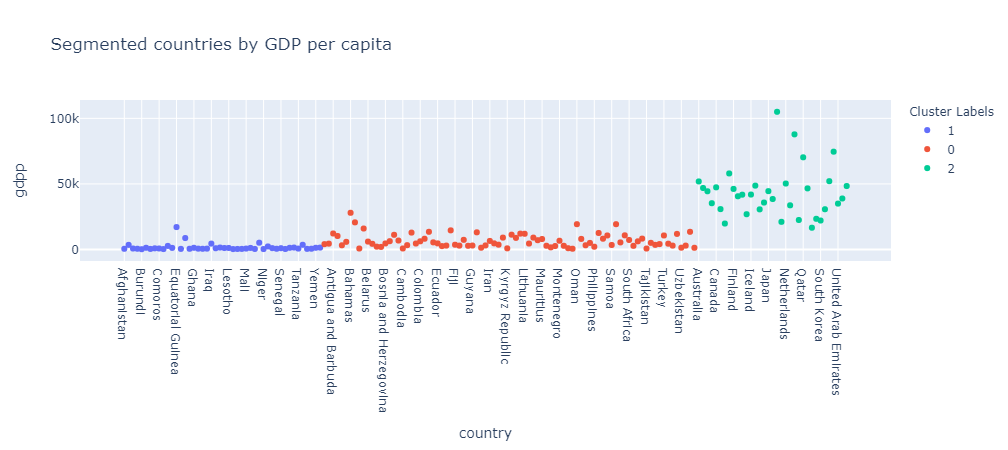

In [27]:
px.scatter(df3, x='country', y='gdpp', color='Cluster Labels', title='Segmented countries by GDP per capita')

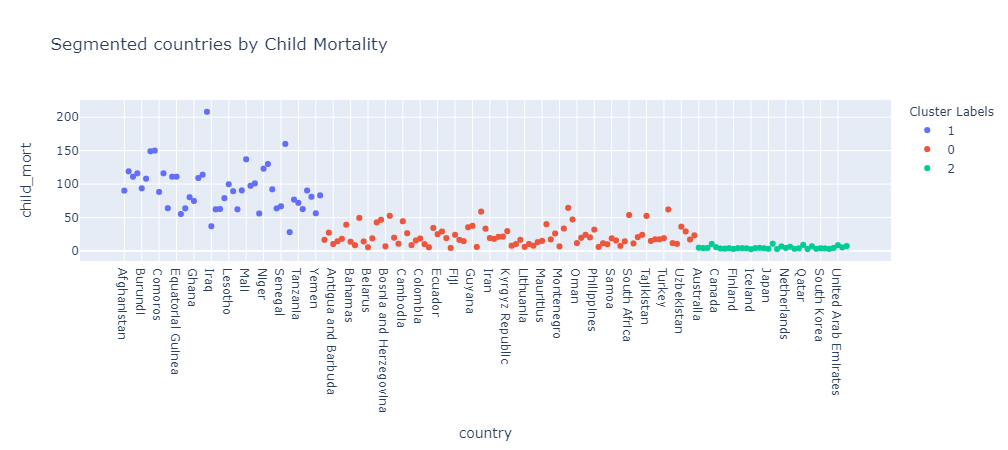

In [28]:
px.scatter(df3, x='country', y='child_mort', color='Cluster Labels', title='Segmented countries by Child Mortality')

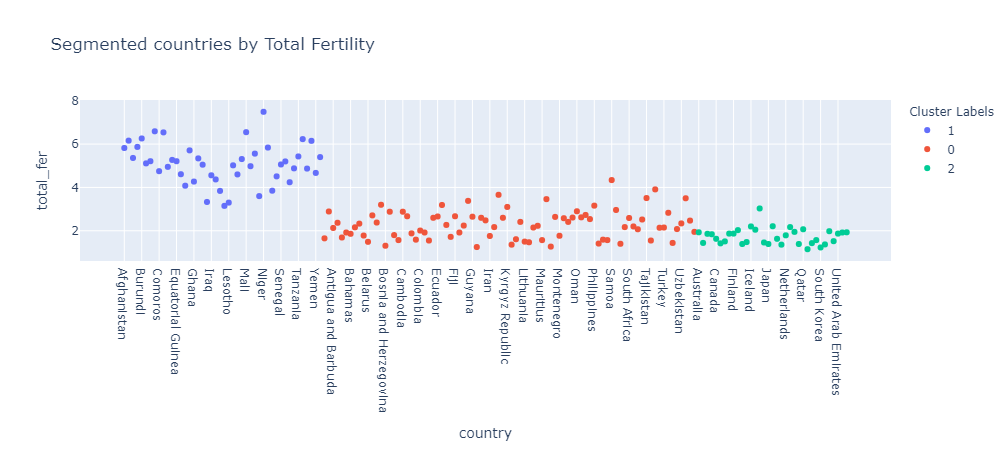

In [29]:
px.scatter(df3, x='country', y='total_fer', color='Cluster Labels', title='Segmented countries by Total Fertility')

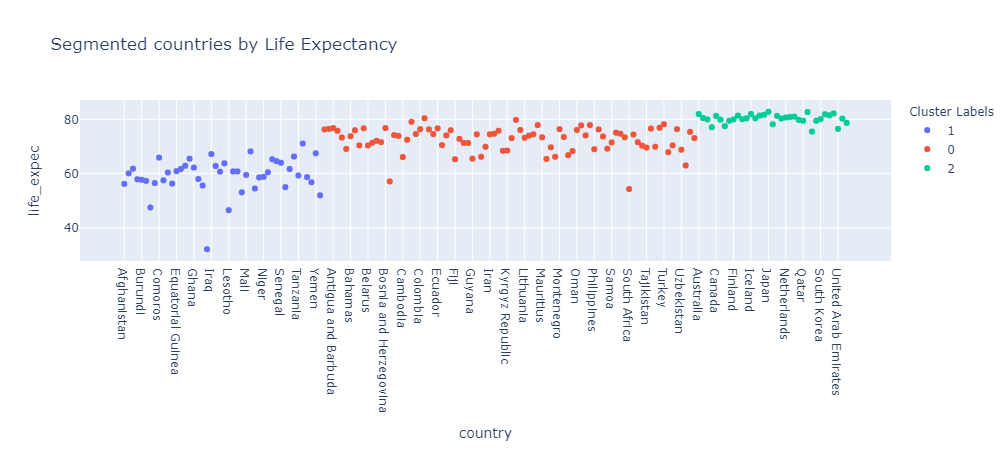

In [30]:
px.scatter(df3, x='country', y='life_expec', color='Cluster Labels', title='Segmented countries by Life Expectancy')

In [31]:
pca = PCA(n_components=5)
comp5 = pca.fit_transform(X)
df5_pca = pd.DataFrame(comp5, columns=['Component 5_1','Component 5_2','Component 5_3','Component 5_4','Component 5_5'])
df5_pca.head()

Component 5_1  Component 5_2  Component 5_3  Component 5_4  Component 5_5
0      -0.599078       0.095490       0.157554      -0.024333      -0.045618
1       0.158474      -0.212092      -0.064189      -0.061247       0.014191
2       0.003686      -0.135867      -0.134182       0.133574      -0.091150
3      -0.650235       0.275975      -0.142672       0.156018      -0.081997
4       0.200711      -0.064662      -0.100715      -0.037902      -0.035799

In [32]:
num_clusters = range(1,10)
inertia = []
for num in num_clusters:
    km = KMeans(init='k-means++', random_state=1, n_clusters=num)
    km.fit(df5_pca)
    inertia.append(km.inertia_)

Text(0, 0.5, 'Inertia')

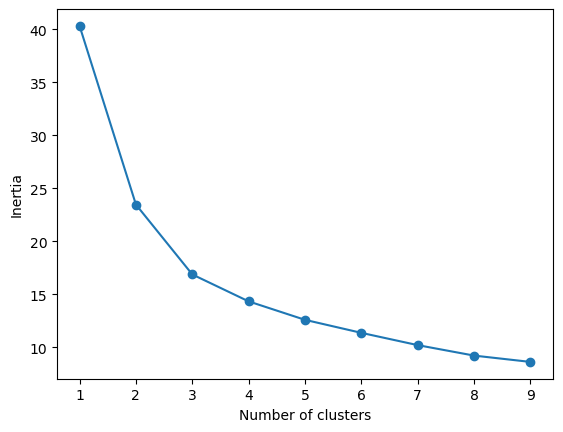

In [33]:
plt.plot(num_clusters, inertia)
plt.scatter(num_clusters, inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

In [34]:
k_opt5 = KMeans(init='k-means++', random_state=1, n_clusters=3)
k_opt5.fit(df5_pca)
k_opt5.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [35]:
df5_pc = df.copy()
df5_pc['Cluster Labels'] = k_opt5.labels_
df5_pc['Cluster Labels'] = df5_pc['Cluster Labels'].astype('str')
df5_pc.head().T

0        1        2       3                    4
country         Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda
child_mort             90.2     16.6     27.3   119.0                 10.3
exports                10.0     28.0     38.4    62.3                 45.5
health                 7.58     6.55     4.17    2.85                 6.03
imports                44.9     48.6     31.4    42.9                 58.9
income                 1610     9930    12900    5900                19100
inflation              9.44     4.49     16.1    22.4                 1.44
life_expec             56.2     76.3     76.5    60.1                 76.8
total_fer              5.82     1.65     2.89    6.16                 2.13
gdpp                    553     4090     4460    3530                12200
Cluster Labels            1        2        2       1                    2

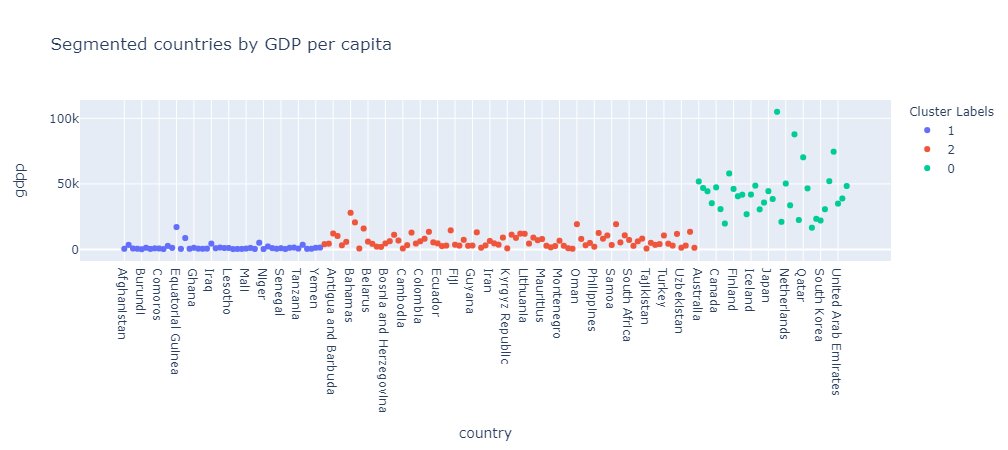

In [36]:
px.scatter(df5_pc, x='country', y='gdpp', color='Cluster Labels', title='Segmented countries by GDP per capita')

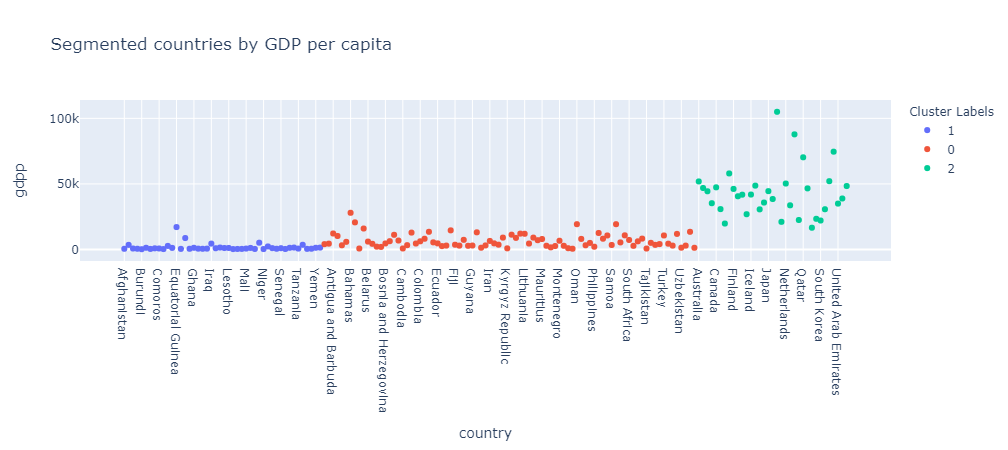

In [37]:
px.scatter(df3, x='country', y='gdpp', color='Cluster Labels', title='Segmented countries by GDP per capita')

In [38]:
pca = PCA(n_components=3)
comp3 = pca.fit_transform(X)
df3_pca = pd.DataFrame(comp3, columns=['Component 3_1','Component 3_2','Component 3_3'])
df3_pca.head()

Component 3_1  Component 3_2  Component 3_3
0      -0.599078       0.095490       0.157554
1       0.158474      -0.212092      -0.064189
2       0.003686      -0.135867      -0.134182
3      -0.650235       0.275975      -0.142672
4       0.200711      -0.064662      -0.100715

In [39]:
num_clusters = range(1,10)
inertia = []
for num in num_clusters:
    km = KMeans(init='k-means++', random_state=1, n_clusters=num)
    km.fit(df3_pca)
    inertia.append(km.inertia_)

Text(0, 0.5, 'Inertia')

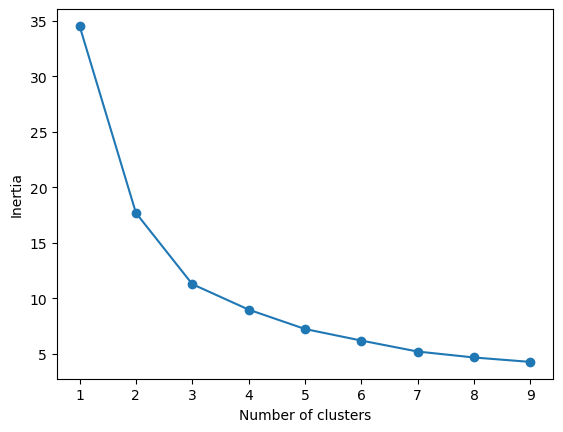

In [40]:
plt.plot(num_clusters, inertia)
plt.scatter(num_clusters, inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

In [41]:
k_opt3 = KMeans(init='k-means++', random_state=1, n_clusters=3)
k_opt3.fit(df3_pca)
k_opt3.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [42]:
df3_pc = df.copy()
df3_pc['Cluster Labels'] = k_opt3.labels_
df3_pc['Cluster Labels'] = df3_pc['Cluster Labels'].astype('str')
df3_pc.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp Cluster Labels  
0       9.44        56.2       5.82    553              0  
1       4.49        76.3       1.65   4090              2  
2      16.10        76.5       2.89   4460              2  
3      22.40        60.1       6.16   3530              0  
4       1.44        76.8       2.13  12200              2

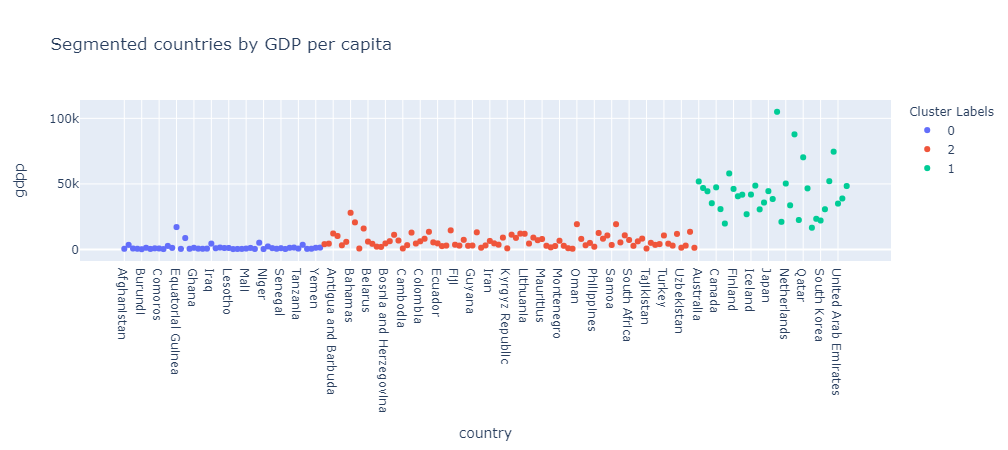

In [43]:
px.scatter(df3_pc, x='country', y='gdpp', color='Cluster Labels', title='Segmented countries by GDP per capita')

In [44]:
df3['Cluster Labels'].compare(df5_pc['Cluster Labels'])

self other
1      0     2
2      0     2
4      0     2
5      0     2
6      0     2
..   ...   ...
160    0     2
161    0     2
162    0     2
163    0     2
164    0     2

[121 rows x 2 columns]

In [45]:
df3['Cluster Labels'].equals(df3_pc['Cluster Labels'])

False

In [46]:
df5_pc['Cluster Labels'].equals(df3_pc['Cluster Labels'])

False

In [47]:
df3_pc['Cluster Labels'].compare(df5_pc['Cluster Labels'])

self other
0      0     1
3      0     1
7      1     0
8      1     0
15     1     0
..   ...   ...
157    1     0
158    1     0
159    1     0
165    0     1
166    0     1

[81 rows x 2 columns]

## DBSCAN

In [48]:
db = DBSCAN(eps=0.25, min_samples=12, metric='euclidean')
db_mol = db.fit(X)
db_mol.labels_

array([ 1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0, -1,  0, -1,  0,  1, -1,  0,  1,  0,  0, -1, -1,  0,
        0,  0, -1,  1, -1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0, -1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0, -1,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  1, -1, -1,  0,  0,
        0,  0, -1, -1,  0,  0, -1,  0,  1,  1,  0,  0,  1, -1, -1,  0, -1,
        0, -1,  0,  0,  1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  1,  0, -1, -1, -1,  0,  0,
       -1, -1,  0,  0,  0,  0,  1,  0,  0, -1,  0,  1,  0, -1,  1,  0,  0,
        0, -1,  1,  0, -1,  0, -1,  0,  0,  0, -1,  0, -1,  1])

In [49]:
df_db = df.copy()
df_db['Cluster Labels'] = db_mol.labels_
df_db['Cluster Labels'] = df_db['Cluster Labels'].astype('str')
df_db.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp Cluster Labels  
0       9.44        56.2       5.82    553              1  
1       4.49        76.3       1.65   4090              0  
2      16.10        76.5       2.89   4460              0  
3      22.40        60.1       6.16   3530             -1  
4       1.44        76.8       2.13  12200              0

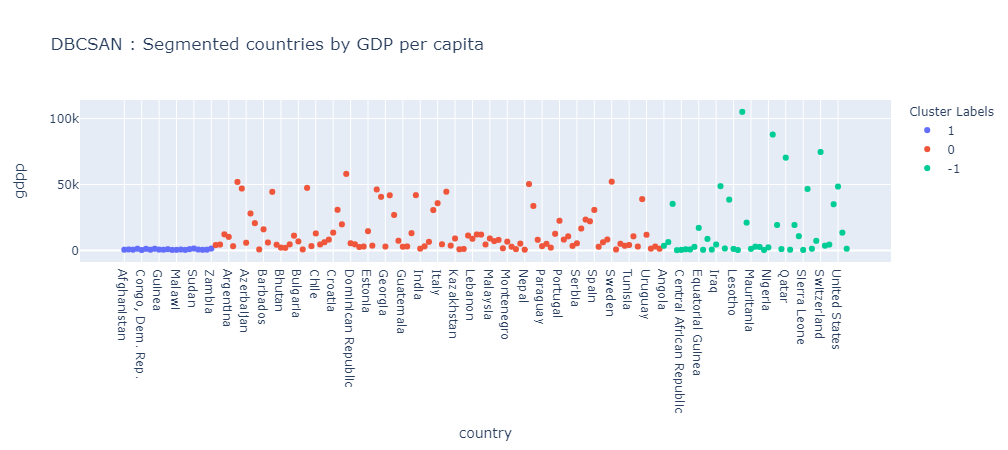

In [50]:
px.scatter(df_db, x='country', y='gdpp', color='Cluster Labels', title='DBCSAN : Segmented countries by GDP per capita')

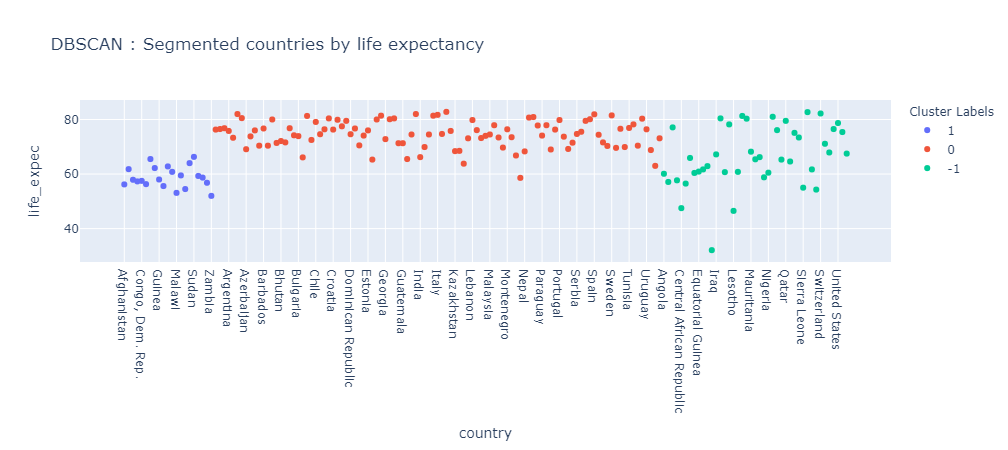

In [51]:
px.scatter(df_db, x='country', y='life_expec', color='Cluster Labels', title='DBSCAN : Segmented countries by life expectancy')

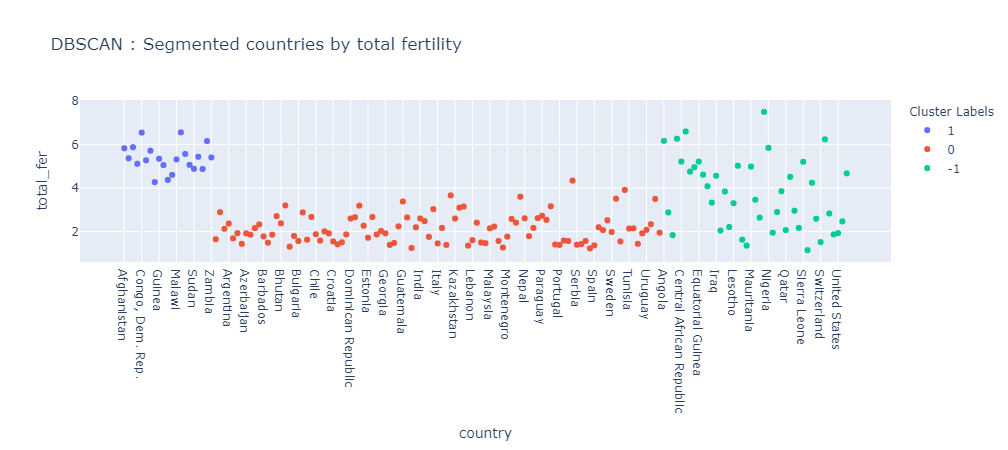

In [52]:
px.scatter(df_db, x='country', y='total_fer', color='Cluster Labels', title='DBSCAN : Segmented countries by total fertility')

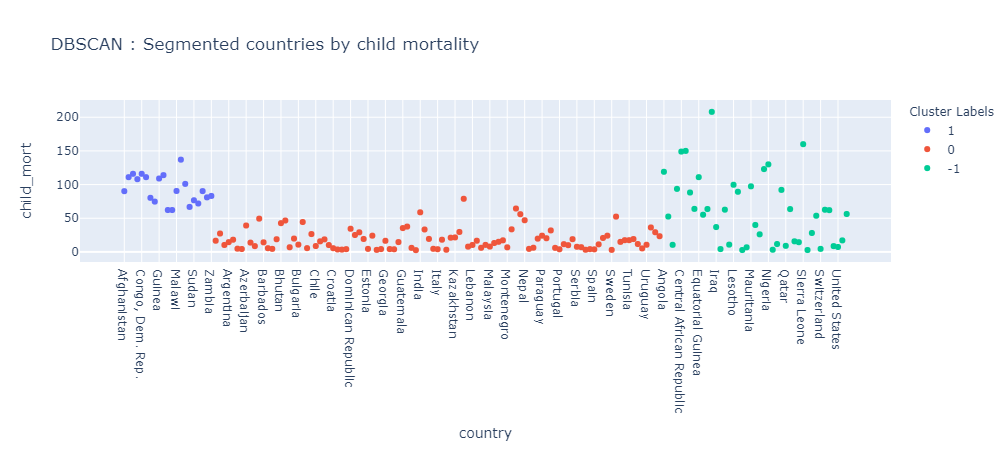

In [53]:
px.scatter(df_db, x='country', y='child_mort', color='Cluster Labels', title='DBSCAN : Segmented countries by child mortality')

In [54]:
pca = PCA(n_components=5)
comp5 = pca.fit_transform(X)
df5_pca = pd.DataFrame(comp5, columns=['Component 5_1','Component 5_2','Component 5_3','Component 5_4','Component 5_5'])
df5_pca.head()

Component 5_1  Component 5_2  Component 5_3  Component 5_4  Component 5_5
0      -0.599078       0.095490       0.157554      -0.024333      -0.045618
1       0.158474      -0.212092      -0.064189      -0.061247       0.014191
2       0.003686      -0.135867      -0.134182       0.133574      -0.091150
3      -0.650235       0.275975      -0.142672       0.156018      -0.081997
4       0.200711      -0.064662      -0.100715      -0.037902      -0.035799

In [55]:
db = DBSCAN(eps=0.12, min_samples=9, metric='euclidean')
db.fit(df5_pca)
db.labels_

array([-1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [56]:
df_db5 = df.copy()
df_db5['Cluster Labels'] = db.labels_
df_db5['Cluster Labels'] = df_db5['Cluster Labels'].astype('str')
df_db5.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp Cluster Labels  
0       9.44        56.2       5.82    553             -1  
1       4.49        76.3       1.65   4090              0  
2      16.10        76.5       2.89   4460             -1  
3      22.40        60.1       6.16   3530             -1  
4       1.44        76.8       2.13  12200              0

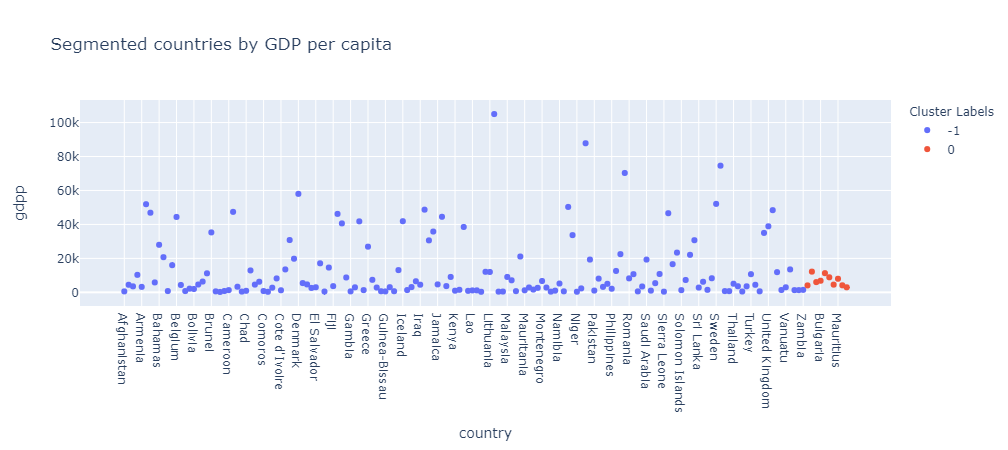

In [57]:
px.scatter(df_db5, x='country', y='gdpp', color='Cluster Labels', title='Segmented countries by GDP per capita')

## Hierarchical Agglomerative Clustering

In [58]:
hac = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')
hac_fit = hac.fit(X)
hac_fit.labels_

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [59]:
df_hac = df.copy()
df_hac['Cluster Labels'] = hac_fit.labels_
df_hac['Cluster Labels'] = df_hac['Cluster Labels'].astype('str')
df_hac.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp Cluster Labels  
0       9.44        56.2       5.82    553              1  
1       4.49        76.3       1.65   4090              0  
2      16.10        76.5       2.89   4460              0  
3      22.40        60.1       6.16   3530              1  
4       1.44        76.8       2.13  12200              0

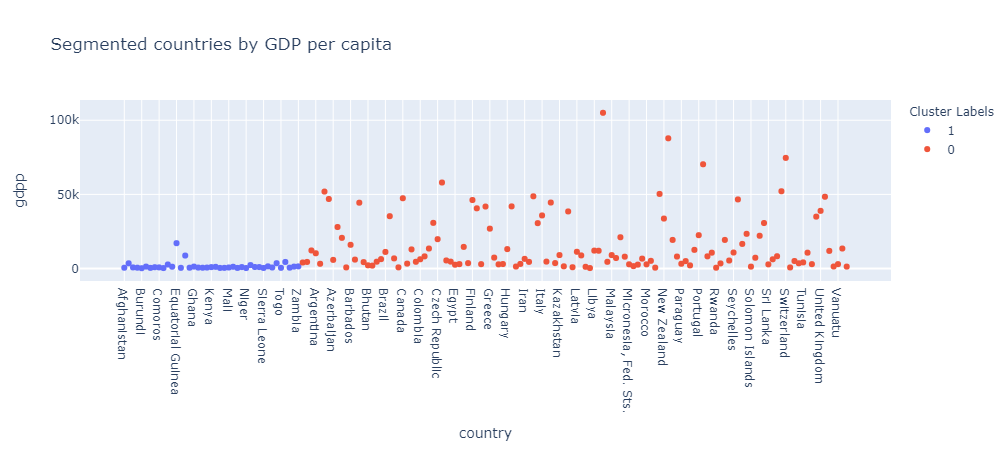

In [60]:
px.scatter(df_hac, x='country', y='gdpp', color='Cluster Labels', title='Segmented countries by GDP per capita')

In [61]:
hac3 = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
hac3_fit = hac3.fit(X)
hac3_fit.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2,
       2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [62]:
df_hac3 = df.copy()
df_hac3['Cluster Labels'] = hac3_fit.labels_
df_hac3['Cluster Labels'] = df_hac3['Cluster Labels'].astype('str')
df_hac3.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp Cluster Labels  
0       9.44        56.2       5.82    553              1  
1       4.49        76.3       1.65   4090              2  
2      16.10        76.5       2.89   4460              2  
3      22.40        60.1       6.16   3530              1  
4       1.44        76.8       2.13  12200              2

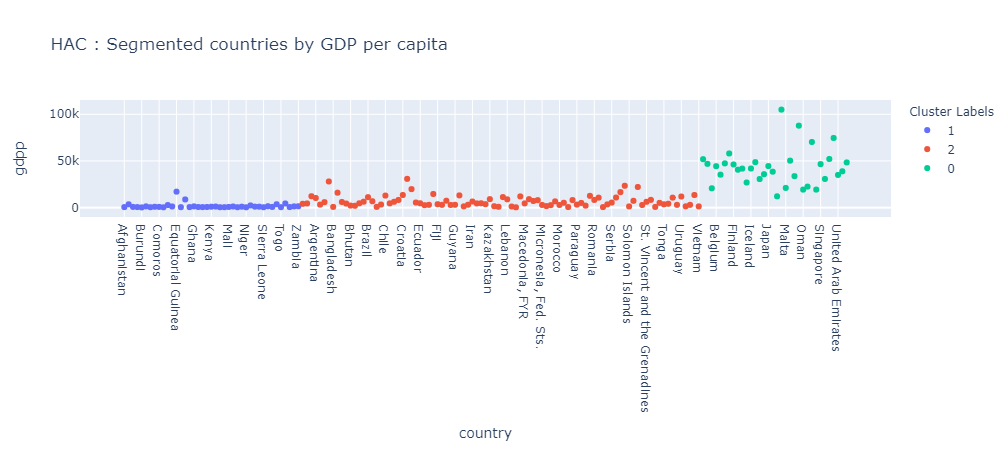

In [63]:
px.scatter(df_hac3, x='country', y='gdpp', color='Cluster Labels', title='HAC : Segmented countries by GDP per capita')

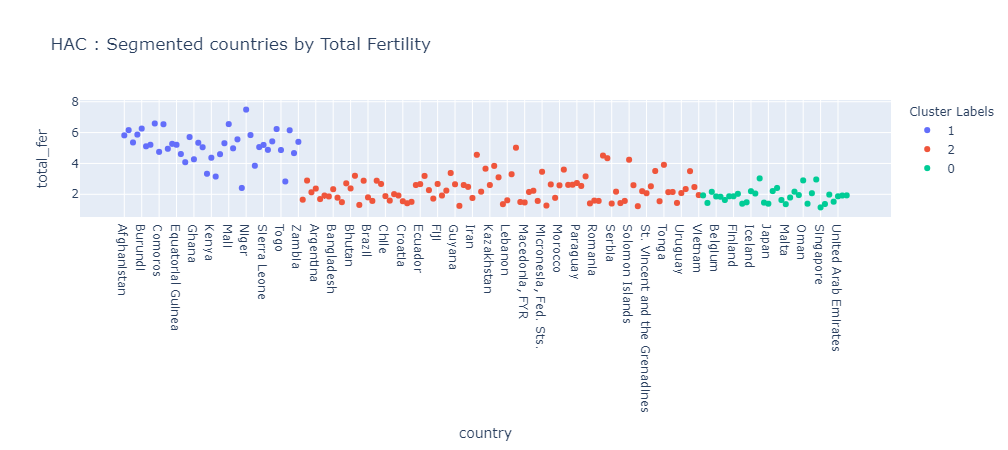

In [64]:
px.scatter(df_hac3, x='country', y='total_fer', color='Cluster Labels', title='HAC : Segmented countries by Total Fertility')

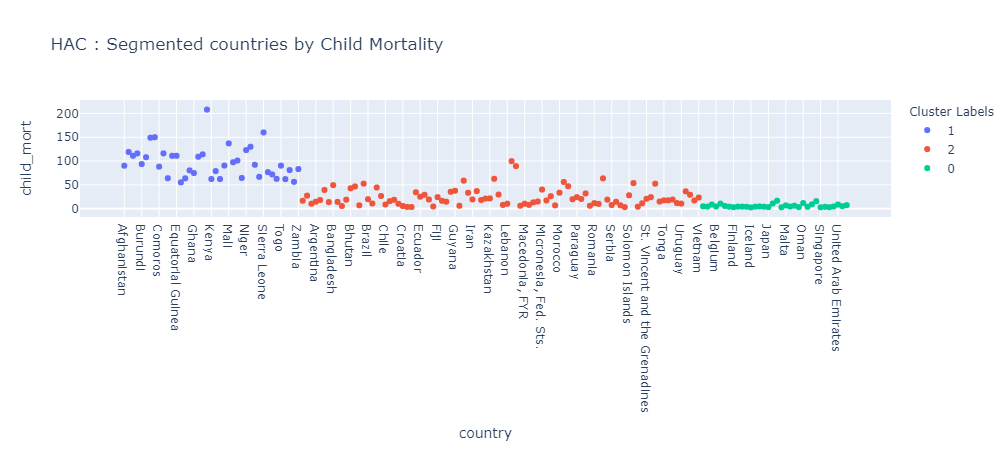

In [65]:
px.scatter(df_hac3, x='country', y='child_mort', color='Cluster Labels', title='HAC : Segmented countries by Child Mortality')

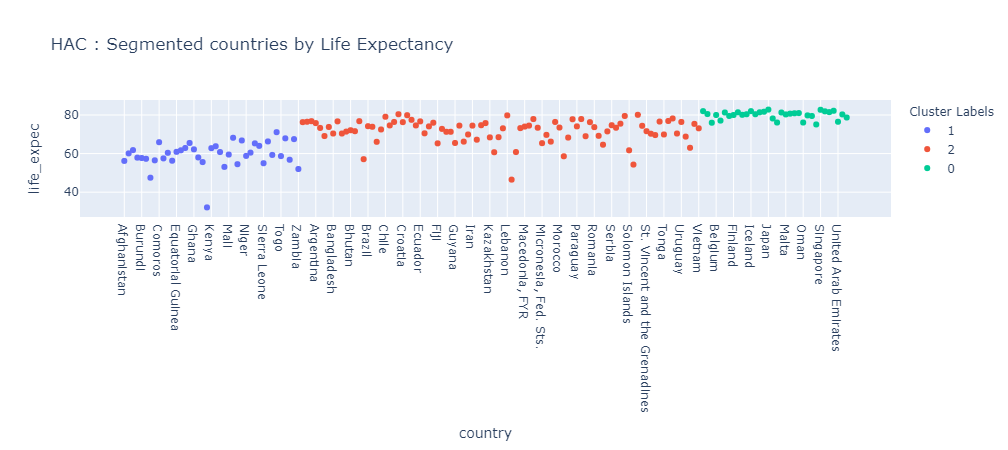

In [66]:
px.scatter(df_hac3, x='country', y='life_expec', color='Cluster Labels', title='HAC : Segmented countries by Life Expectancy')

In [67]:
pca = PCA(n_components=5)
comp5 = pca.fit_transform(X)
df5_pca = pd.DataFrame(comp5, columns=['Component 5_1','Component 5_2','Component 5_3','Component 5_4','Component 5_5'])
df5_pca.head()

Component 5_1  Component 5_2  Component 5_3  Component 5_4  Component 5_5
0      -0.599078       0.095490       0.157554      -0.024333      -0.045618
1       0.158474      -0.212092      -0.064189      -0.061247       0.014191
2       0.003686      -0.135867      -0.134182       0.133574      -0.091150
3      -0.650235       0.275975      -0.142672       0.156018      -0.081997
4       0.200711      -0.064662      -0.100715      -0.037902      -0.035799

In [68]:
hac3 = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')

In [69]:
hac3_pca = hac3.fit(comp5)
hac3_pca.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1,
       1, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [70]:
df_hac3pca = df.copy()
df_hac3pca['Cluster Labels'] = hac3_pca.labels_
df_hac3pca['Cluster Labels'] = df_hac3pca['Cluster Labels'].astype('str')
df_hac3pca.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp Cluster Labels  
0       9.44        56.2       5.82    553              1  
1       4.49        76.3       1.65   4090              2  
2      16.10        76.5       2.89   4460              2  
3      22.40        60.1       6.16   3530              1  
4       1.44        76.8       2.13  12200              2

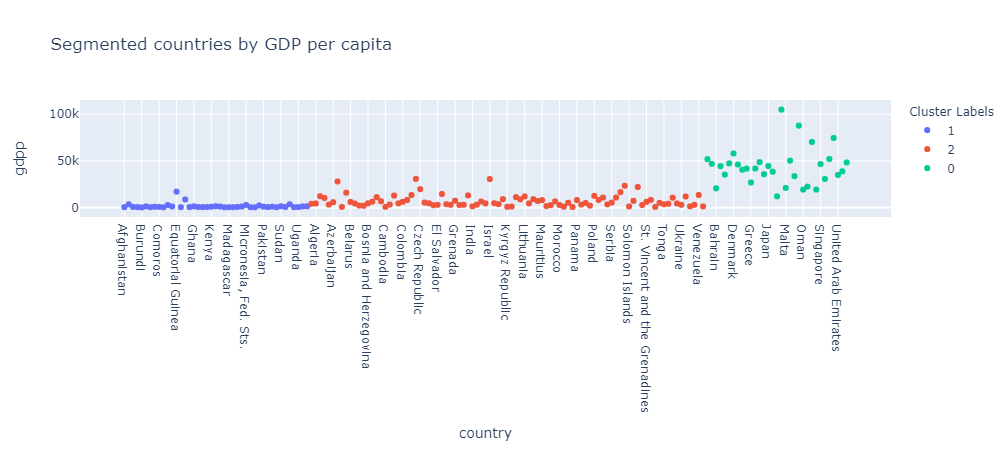

In [71]:
px.scatter(df_hac3pca, x='country', y='gdpp', color='Cluster Labels', title='Segmented countries by GDP per capita')

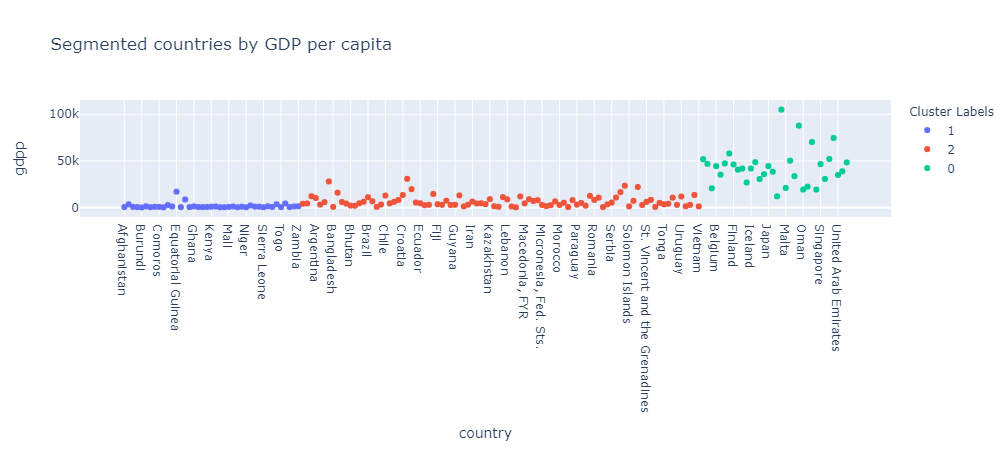

In [72]:
px.scatter(df_hac3, x='country', y='gdpp', color='Cluster Labels', title='Segmented countries by GDP per capita')

In [73]:
a = df3['Cluster Labels']
b = df_hac3['Cluster Labels']

In [74]:
b

0      1
1      2
2      2
3      1
4      2
      ..
162    2
163    2
164    2
165    1
166    1
Name: Cluster Labels, Length: 167, dtype: object

In [75]:
for i, k in enumerate(b):
    if k == 0:
        b[i] = '2'
    if k == 2:
        b[i] = '0'

In [76]:
b

0      1
1      2
2      2
3      1
4      2
      ..
162    2
163    2
164    2
165    1
166    1
Name: Cluster Labels, Length: 167, dtype: object

In [77]:
a.compare(b)

self other
1      0     2
2      0     2
4      0     2
5      0     2
6      0     2
..   ...   ...
160    0     2
161    0     2
162    0     2
163    0     2
164    0     2

[119 rows x 2 columns]

## Mean-Shift Clustering

In [183]:
band = estimate_bandwidth(X, quantile=0.56, n_samples=6)
band

0.6522663639810129

In [184]:
ms = MeanShift(bandwidth=band, bin_seeding=True)
ms_mod = ms.fit(X)
ms_mod.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [185]:
df_ms = df.copy()
df_ms['Cluster Labels'] = ms_mod.labels_
df_ms['Cluster Labels'] = df_ms['Cluster Labels'].astype('str') # This is to plot the values in Plotly
df_ms.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp Cluster Labels  
0       9.44        56.2       5.82    553              0  
1       4.49        76.3       1.65   4090              0  
2      16.10        76.5       2.89   4460              0  
3      22.40        60.1       6.16   3530              1  
4       1.44        76.8       2.13  12200              0

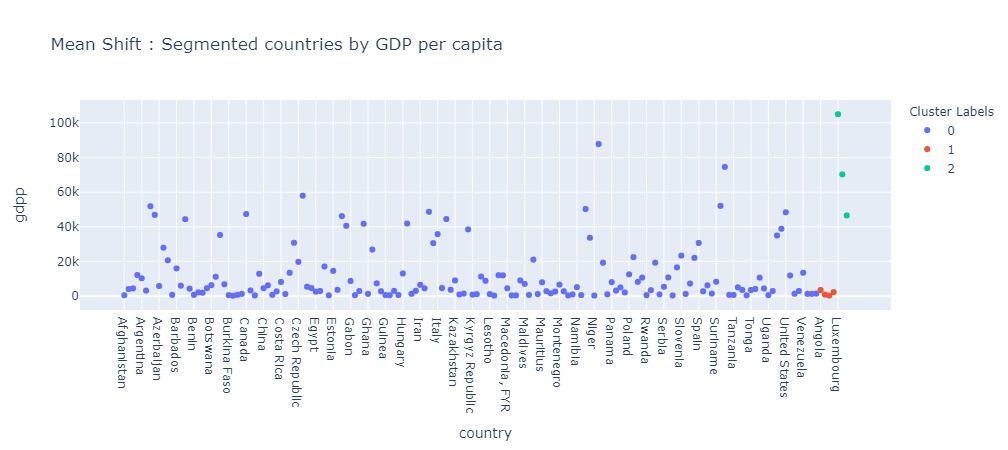

In [189]:
px.scatter(df_ms, x='country', y='gdpp', color='Cluster Labels', title='Mean Shift : Segmented countries by GDP per capita')

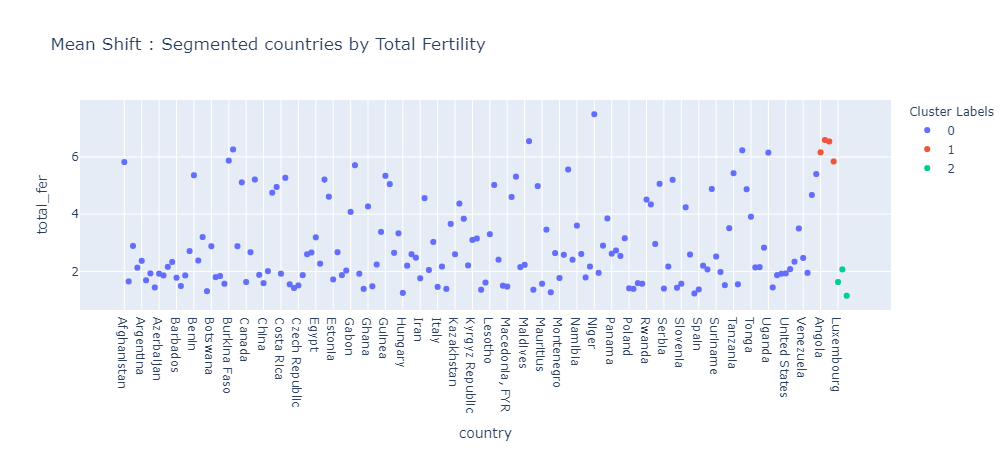

In [188]:
px.scatter(df_ms, x='country', y='total_fer', color='Cluster Labels', title='Mean Shift : Segmented countries by Total Fertility')

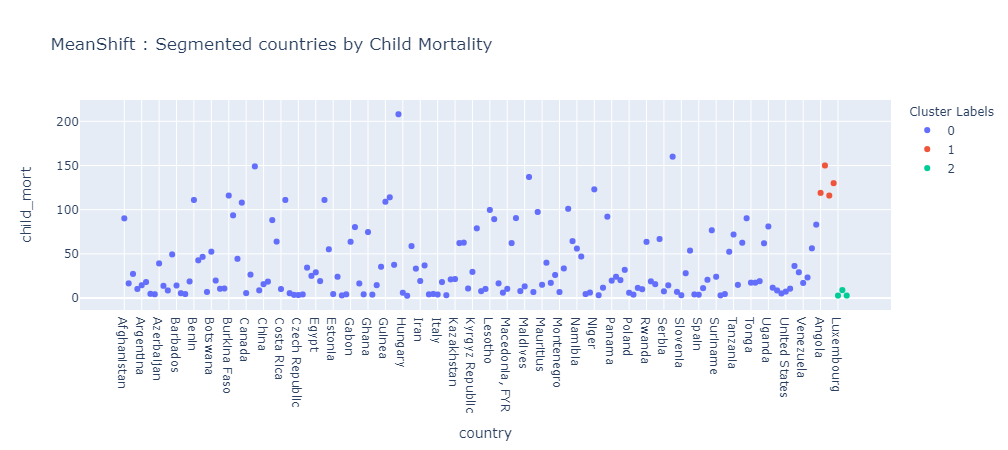

In [190]:
px.scatter(df_ms, x='country', y='child_mort', color='Cluster Labels', title='MeanShift : Segmented countries by Child Mortality')

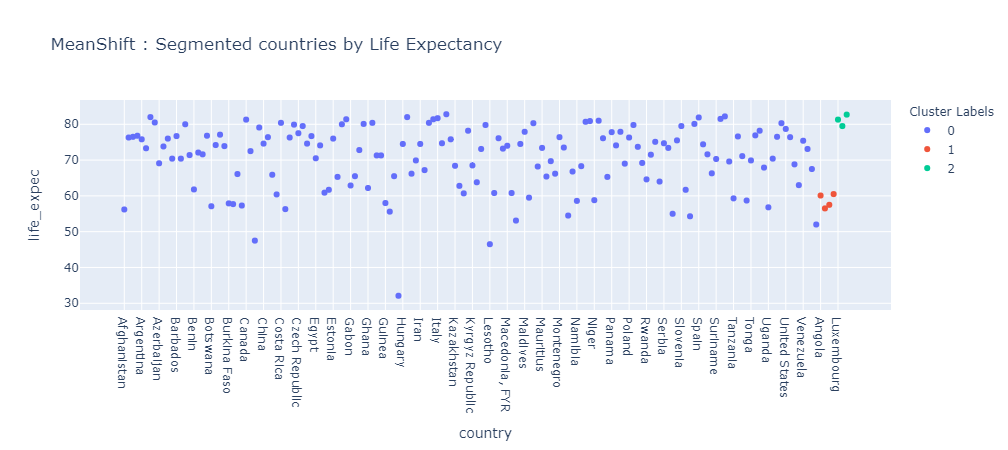

In [191]:
px.scatter(df_ms, x='country', y='life_expec', color='Cluster Labels', title='MeanShift : Segmented countries by Life Expectancy')

In [89]:
!pip install scikit-learn-extra

In [84]:
from sklearn_extra.cluster import KMedoids

In [192]:
k_med = KMedoids(random_state=1, n_clusters=3)
k_med.fit(X)
k_med.labels_

array([1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2,
       0, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1,
       1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 2,
       1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0,
       2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1])

In [194]:
df_med = df.copy()
df_med['Cluster Labels'] = k_med.labels_
df_med['Cluster Labels'] = df_med['Cluster Labels'].astype('str')
df_med.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp Cluster Labels  
0       9.44        56.2       5.82    553              1  
1       4.49        76.3       1.65   4090              2  
2      16.10        76.5       2.89   4460              2  
3      22.40        60.1       6.16   3530              1  
4       1.44        76.8       2.13  12200              2

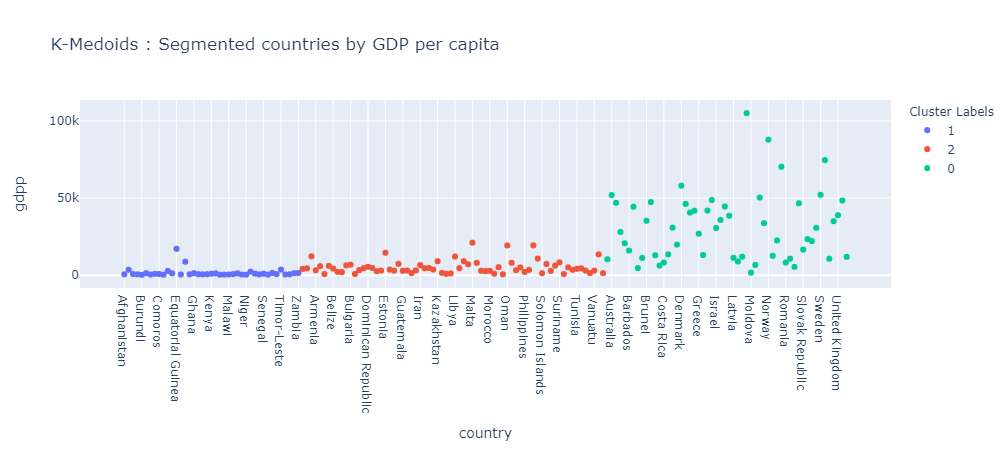

In [196]:
px.scatter(df_med, x='country', y='gdpp', color='Cluster Labels', title='K-Medoids : Segmented countries by GDP per capita')

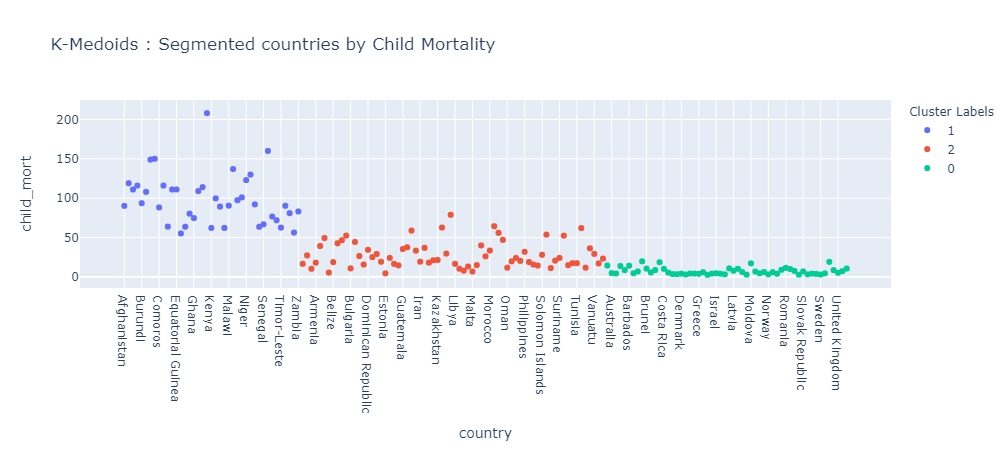

In [197]:
px.scatter(df_med, x='country', y='child_mort', color='Cluster Labels', title='K-Medoids : Segmented countries by Child Mortality')

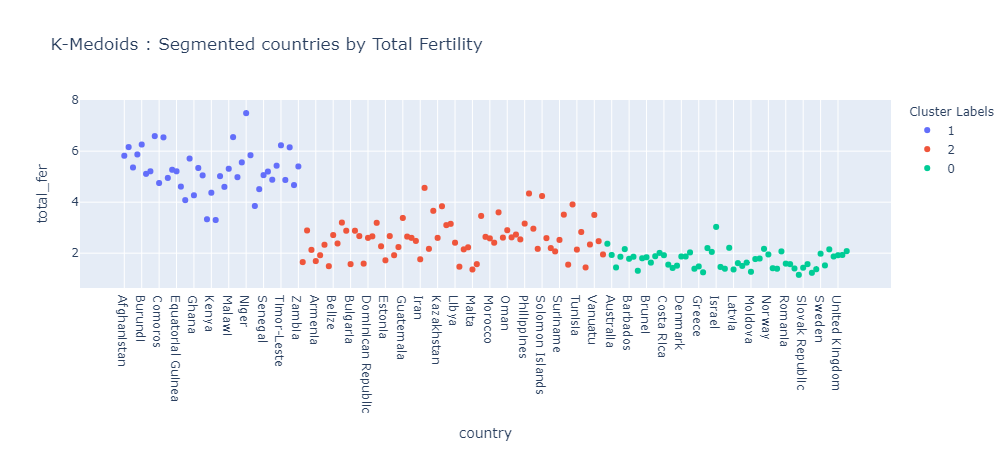

In [198]:
px.scatter(df_med, x='country', y='total_fer', color='Cluster Labels', title='K-Medoids : Segmented countries by Total Fertility')

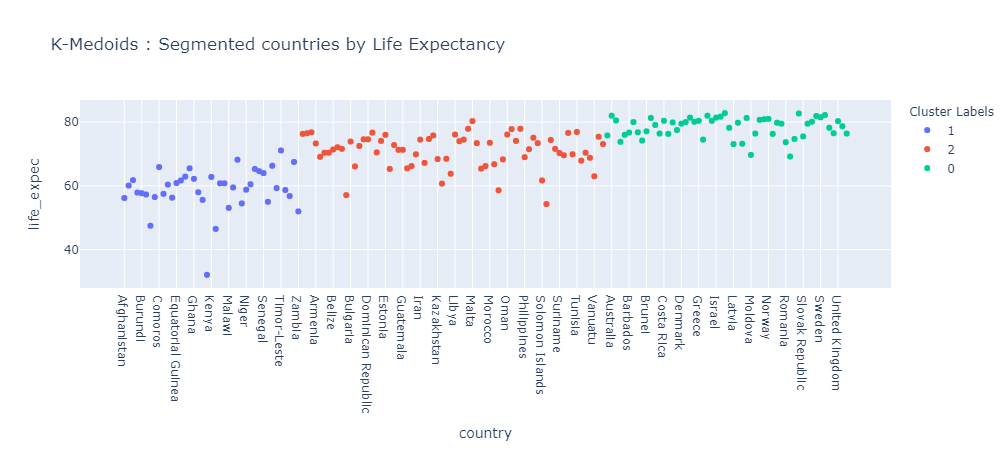

In [199]:
px.scatter(df_med, x='country', y='life_expec', color='Cluster Labels', title='K-Medoids : Segmented countries by Life Expectancy')